In [16]:
import pandas as pd
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz 
import warnings

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [18]:
df = pd.read_csv("illegal_animals_kept_as_pets1.csv")

In [19]:
df.columns = df.columns.str.replace(" ","_").str.lower()

In [20]:
df.descriptor.value_counts()

Rooster                       1794
Other                          847
Farm Animal                    513
Snake                          256
Ferret                          74
Monkey                          36
Iguana                          34
Turtle Under 4 inches Long      13
Name: descriptor, dtype: int64

In [33]:
turtle = df[df.descriptor == 'Turtle Under 4 inches Long']

In [36]:
turtle.borough.value_counts()

BROOKLYN     9
BRONX        2
MANHATTAN    1
QUEENS       1
Name: borough, dtype: int64

In [24]:
monkey = df[df.descriptor == 'Monkey']

In [31]:
iguana = df[df.descriptor == 'Iguana']

In [32]:
iguana.borough.value_counts()

BROOKLYN         17
MANHATTAN         5
BRONX             4
QUEENS            4
STATEN ISLAND     4
Name: borough, dtype: int64

In [30]:
monkey.borough.value_counts()

QUEENS           11
BROOKLYN         10
STATEN ISLAND     6
BRONX             6
MANHATTAN         3
Name: borough, dtype: int64

In [21]:
len(df)

3567

In [7]:
%%time

df['closed_date'] = pd.to_datetime(df.closed_date, format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
df['created_date'] = pd.to_datetime(df.created_date, format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
df.head()

CPU times: user 30.1 ms, sys: 4.14 ms, total: 34.3 ms
Wall time: 33.4 ms


unique_key        created_date         closed_date agency  \
0    17576697 2010-07-04 09:24:08                 NaT  DOHMH   
1    49924537 2021-03-03 12:03:24 2021-03-03 12:03:24  DOHMH   
2    39466100 2018-06-14 10:49:41                 NaT  DOHMH   
3    39505735 2018-06-19 17:45:35                 NaT  DOHMH   
4    39529310 2018-06-21 09:04:21                 NaT  DOHMH   

                               agency_name              complaint_type  \
0  Department of Health and Mental Hygiene  Illegal Animal Kept as Pet   
1  Department of Health and Mental Hygiene  Illegal Animal Kept as Pet   
2  Department of Health and Mental Hygiene  Illegal Animal Kept as Pet   
3  Department of Health and Mental Hygiene  Illegal Animal Kept as Pet   
4  Department of Health and Mental Hygiene  Illegal Animal Kept as Pet   

    descriptor location_type  incident_zip             incident_address  \
0      Rooster     Residence       11374.0               99-11 62 DRIVE   
1      Rooster     Residence       11361.0             34-42 200 STREET   
2       Ferret     Residence       10036.0  1120 AVENUE OF THE AMERICAS   
3  Farm Animal     Residence       10027.0          430 WEST 125 STREET   
4        Other     Residence       11375.0             102-15 63 AVENUE   

              street_name  cross_street_1         cross_street_2  \
0                62 DRIVE       99 STREET             102 STREET   
1              200 STREET       34 AVENUE              35 AVENUE   
2  AVENUE OF THE AMERICAS  WEST 43 STREET         WEST 44 STREET   
3         WEST 125 STREET            BEND       AMSTERDAM AVENUE   
4               63 AVENUE      102 STREET  YELLOWSTONE BOULEVARD   

  intersection_street_1  intersection_street_2 address_type          city  \
0                   NaN                    NaN      ADDRESS     REGO PARK   
1             34 AVENUE              35 AVENUE      ADDRESS       Bayside   
2        WEST 43 STREET         WEST 44 STREET      ADDRESS      NEW YORK   
3                  BEND       AMSTERDAM AVENUE      ADDRESS      NEW YORK   
4            102 STREET  YELLOWSTONE BOULEVARD      ADDRESS  FOREST HILLS   

     landmark  facility_type       status                due_date  \
0         NaN            NaN     Assigned  08/03/2010 09:24:08 AM   
1  200 STREET            NaN       Closed                     NaN   
2         NaN            NaN  In Progress  07/14/2018 10:49:41 AM   
3         NaN            NaN  In Progress  07/19/2018 05:45:35 PM   
4         NaN            NaN  In Progress  07/21/2018 09:04:21 AM   

                              resolution_description  \
0  The Department of Health and Mental Hygiene ha...   
1  The Department of Health and Mental Hygiene tr...   
2  The Department of Health and Mental Hygiene ha...   
3  The Department of Health and Mental Hygiene ha...   
4  The Department of Health and Mental Hygiene ha...   

  resolution_action_updated_date community_board    borough  \
0         07/08/2010 09:29:53 AM       06 QUEENS     QUEENS   
1         03/03/2021 12:03:24 PM       11 QUEENS     QUEENS   
2         06/15/2018 08:12:15 PM    05 MANHATTAN  MANHATTAN   
3         06/21/2018 08:43:09 PM    09 MANHATTAN  MANHATTAN   
4         06/21/2018 08:43:10 PM       06 QUEENS     QUEENS   

   x_coordinate_(state_plane)  y_coordinate_(state_plane) park_facility_name  \
0                   1023792.0                    206643.0        Unspecified   
1                   1043159.0                    218366.0        Unspecified   
2                    988817.0                    214581.0        Unspecified   
3                    996723.0                    235054.0        Unspecified   
4                   1024496.0                    206640.0        Unspecified   

  park_borough  vehicle_type  taxi_company_borough  taxi_pick_up_location  \
0       QUEENS           NaN                   NaN                    NaN   
1       QUEENS           NaN                   NaN                    NaN   
2    MA

In [43]:
df.resample('M', on='created_date').size().sort_values(ascending=False)

created_date
2021-09-30    73
2020-08-31    72
2021-04-30    71
2020-09-30    69
2021-05-31    63
              ..
2013-12-31     6
2017-12-31     4
2014-01-31     4
2010-02-28     4
2015-02-28     3
Length: 147, dtype: int64

<AxesSubplot:title={'center':'Illegal pet sightings'}, xlabel='created_date'>

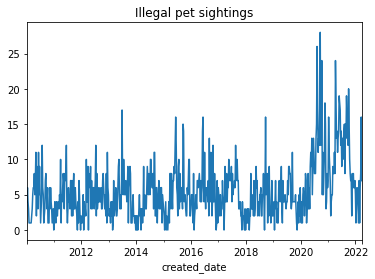

In [8]:
df.resample('W', on='created_date').size() \
    .plot(title="Illegal pet sightings")




In [9]:
df.groupby('borough').descriptor.value_counts() \
    .groupby(level=0, group_keys=False) \
    .nlargest(10)

borough        descriptor                
BRONX          Rooster                       370
               Other                         140
               Farm Animal                    63
               Snake                          42
               Ferret                         16
               Monkey                          6
               Iguana                          4
               Turtle Under 4 inches Long      2
BROOKLYN       Rooster                       512
               Other                         236
               Farm Animal                   174
               Snake                          89
               Ferret                         17
               Iguana                         17
               Monkey                         10
               Turtle Under 4 inches Long      9
MANHATTAN      Other                         108
               Rooster                       104
               Farm Animal                    46
               Snake       

In [10]:
df[df.descriptor == 'Other']

unique_key        created_date         closed_date agency  \
4       39529310 2018-06-21 09:04:21                 NaT  DOHMH   
6       39727749 2018-07-14 09:26:33                 NaT  DOHMH   
8       40376776 2018-09-25 13:06:15                 NaT  DOHMH   
9       39779594 2018-07-19 23:25:00                 NaT  DOHMH   
10      42610547 2019-05-07 22:31:49                 NaT  DOHMH   
12      39786185 2018-07-20 18:16:09                 NaT  DOHMH   
14      39929435 2018-08-05 05:45:10                 NaT  DOHMH   
35      40093730 2018-08-24 16:34:36                 NaT  DOHMH   
36      43642062 2019-08-26 15:32:09                 NaT  DOHMH   
44      40479862 2018-10-06 10:17:33                 NaT  DOHMH   
46      40512911 2018-10-10 04:13:07                 NaT  DOHMH   
63      40779106 2018-11-08 12:24:58                 NaT  DOHMH   
69      52226594 2021-10-18 12:26:58 2021-10-18 12:26:58  DOHMH   
70      41037599 2018-11-26 08:01:37                 NaT  DOHMH   
73      40322602 2018-09-19 19:56:10                 NaT  DOHMH   
76      40332355 2018-09-20 07:15:05                 NaT  DOHMH   
87      41153045 2018-12-10 11:25:27                 NaT  DOHMH   
92      41245281 2018-12-21 16:21:36                 NaT  DOHMH   
93      41331495 2019-01-03 16:52:55                 NaT  DOHMH   
94      43733490 2019-09-05 15:58:01                 NaT  DOHMH   
96      41355537 2019-01-06 15:30:06                 NaT  DOHMH   
97      41356865 2019-01-06 17:26:40                 NaT  DOHMH   
99      41374150 2019-01-08 14:08:47                 NaT  DOHMH   
107     43762768 2019-09-11 14:45:16                 NaT  DOHMH   
111     41543682 2019-01-29 00:44:59                 NaT  DOHMH   
113     41563393 2019-01-30 11:11:14                 NaT  DOHMH   
114     41583069 2019-02-01 09:06:26                 NaT  DOHMH   
116     51485057 2021-08-10 09:41:31                 NaT  DOHMH   
117     41107744 2018-12-04 16:24:35                 NaT  DOHMH   
126     41656113 2019-02-08 18:17:18                 NaT  DOHMH   
127     41684683 2019-02-12 19:39:22                 NaT  DOHMH   
131     41725259 2019-02-17 17:13:03                 NaT  DOHMH   
137     42190243 2019-04-10 19:03:02                 NaT  DOHMH   
142     18638687 2010-09-07 13:02:04 2010-10-21 08:56:51  DOHMH   
144     43835658 2019-09-11 12:48:40                 NaT  DOHMH   
147     41945225 2019-03-13 17:13:14                 NaT  DOHMH   
151     43839938 2019-09-11 14:08:20                 NaT  DOHMH   
155     18684028 2010-09-14 09:41:55 2010-09-30 11:43:44  DOHMH   
161     42058949 2019-03-26 15:54:42                 NaT  DOHMH   
163     42088212 2019-03-29 20:46:04                 NaT  DOHMH   
166     18691618 2010-09-15 16:14:38 2010-09-16 09:32:09  DOHMH   
173     42275566 2019-04-20 12:27:23                 NaT  DOHMH   
176     42381545 2019-04-24 08:48:18                 NaT  DOHMH   
177     51350932 2021-07-27 09:36:29 2021-07-27 09:36:29  DOHMH   
178     18791909 2010-09-29 11:38:20 2010-10-28 14:28:21  DOHMH   
187     42606959 2019-05-07 17:53:35                 NaT  DOHMH   
191     43961548 2019-07-08 16:26:39                 NaT  DOHMH   
192     42630668 2019-05-09 16:18:21                 NaT  DOHMH   
194     43933027 2019-09-30 08:56:16                 NaT  DOHMH   
196     42674223 2019-05-15 18:48:47                 NaT  DOHMH   
197     42739967 2019-05-21 23:38:16                 NaT  DOHMH   
203     43462215 2019-08-04 09:57:57                 NaT  DOHMH   
205     19036482 2010-11-03 14:37:49 2010-11-03 15:38:48  DOHMH   
206     42828100 2019-05-31 19:19:50                 NaT  DOHMH   
208     43531371 2019-08-12 22:04:52                 NaT  DOHMH   
209     42850831 2019-06-03 09:48:35                 NaT  DOHMH   
211     42889681 2019-06-06 20:51:00                 NaT  DOHMH   
212     52354282 2021-10-29 20:46:30                 NaT  DOHMH   
217     42872824 2019-06-04 09:22:37                 

In [11]:
df.status.value_counts()

Assigned       1183
Closed         1162
In Progress     930
Open            289
Pending           3
Name: status, dtype: int64

In [12]:
status_open = df[df.status != "Closed"]

In [15]:
status_open

unique_key        created_date closed_date agency  \
0       17576697 2010-07-04 09:24:08         NaT  DOHMH   
2       39466100 2018-06-14 10:49:41         NaT  DOHMH   
3       39505735 2018-06-19 17:45:35         NaT  DOHMH   
4       39529310 2018-06-21 09:04:21         NaT  DOHMH   
5       39550869 2018-06-24 14:35:07         NaT  DOHMH   
6       39727749 2018-07-14 09:26:33         NaT  DOHMH   
7       39744577 2018-07-17 00:13:03         NaT  DOHMH   
8       40376776 2018-09-25 13:06:15         NaT  DOHMH   
9       39779594 2018-07-19 23:25:00         NaT  DOHMH   
10      42610547 2019-05-07 22:31:49         NaT  DOHMH   
11      42822597 2019-05-30 12:20:48         NaT  DOHMH   
12      39786185 2018-07-20 18:16:09         NaT  DOHMH   
13      43567433 2019-08-16 07:08:10         NaT  DOHMH   
14      39929435 2018-08-05 05:45:10         NaT  DOHMH   
15      43581937 2019-08-19 16:25:43         NaT  DOHMH   
16      39981128 2018-08-10 19:54:32         NaT  DOHMH   
17      39584158 2018-06-27 15:33:21         NaT  DOHMH   
19      43594816 2019-08-20 16:48:10         NaT  DOHMH   
21      39627459 2018-07-02 22:35:48         NaT  DOHMH   
22      39630940 2018-07-03 12:37:22         NaT  DOHMH   
23      39647378 2018-07-05 19:41:31         NaT  DOHMH   
24      39681012 2018-07-09 19:22:58         NaT  DOHMH   
26      40253171 2018-09-11 19:23:47         NaT  DOHMH   
27      40304676 2018-09-17 07:49:25         NaT  DOHMH   
28      40294992 2018-09-16 20:18:58         NaT  DOHMH   
29      40295747 2018-09-16 12:57:20         NaT  DOHMH   
30      43627734 2019-08-24 12:28:00         NaT  DOHMH   
31      40051858 2018-08-19 10:56:17         NaT  DOHMH   
32      40053683 2018-08-19 17:23:52         NaT  DOHMH   
33      40053691 2018-08-19 17:27:15         NaT  DOHMH   
34      40072613 2018-08-21 07:21:59         NaT  DOHMH   
35      40093730 2018-08-24 16:34:36         NaT  DOHMH   
36      43642062 2019-08-26 15:32:09         NaT  DOHMH   
37      40152690 2018-08-30 15:03:20         NaT  DOHMH   
38      40167655 2018-09-01 07:02:52         NaT  DOHMH   
39      43287197 2019-07-15 12:09:31         NaT  DOHMH   
40      40242617 2018-09-10 15:04:02         NaT  DOHMH   
41      43669012 2019-08-28 09:41:34         NaT  DOHMH   
42      40456921 2018-10-04 14:30:19         NaT  DOHMH   
43      40478743 2018-10-06 18:08:43         NaT  DOHMH   
44      40479862 2018-10-06 10:17:33         NaT  DOHMH   
45      40491388 2018-10-08 14:00:01         NaT  DOHMH   
46      40512911 2018-10-10 04:13:07         NaT  DOHMH   
47      40513223 2018-10-10 17:05:13         NaT  DOHMH   
48      40517528 2018-10-11 10:31:46         NaT  DOHMH   
49      40526512 2018-10-12 13:23:38         NaT  DOHMH   
50      43678725 2019-08-30 10:34:04         NaT  DOHMH   
52      40595087 2018-10-19 10:19:20         NaT  DOHMH   
53      40637353 2018-10-23 13:34:40         NaT  DOHMH   
54      40661162 2018-10-25 07:45:50         NaT  DOHMH   
55      40667901 2018-10-26 14:27:51         NaT  DOHMH   
56      40680918 2018-10-28 10:59:50         NaT  DOHMH   
57      40724174 2018-11-02 11:30:41         NaT  DOHMH   
58      40751247 2018-11-05 07:37:48         NaT  DOHMH   
59      40760525 2018-11-06 14:53:06         NaT  DOHMH   
60      40761499 2018-11-06 14:42:54         NaT  DOHMH   
61      40775682 2018-11-08 15:36:01         NaT  DOHMH   
62      40777972 2018-11-08 11:08:27         NaT  DOHMH   
63      40779106 2018-11-08 12:24:58         NaT  DOHMH   
64      40903859 2018-11-10 11:34:19         NaT  DOHMH   
65      40937729 2018-11-14 09:58:44         NaT  DOHMH   
66      40994752 2018-11-20 12:27:03         NaT  DOHMH   
67      41014616 2018-11-23 22:40:53         NaT  DOHMH   
68      41025809 2018-11-24 11:28:39         NaT  DOHMH   
70      41037599 2018-11-26 08:01:37         NaT  DOHMH   
71      40307029 2018-09-17 14:21:35         NaT  DOHMH   
72      40316001 2018-09-18 10:56:45         NaT  DOH

In [14]:
status_open.descriptor.value_counts()

Rooster                       1206
Other                          565
Farm Animal                    369
Snake                          159
Ferret                          52
Iguana                          23
Monkey                          22
Turtle Under 4 inches Long       9
Name: descriptor, dtype: int64